Utilize the dataset (diabetes.csv) to perform Descriptive analytics with necessary inference.
Also, perform the operations
--> Which features have an outlier? (use Boxplot chart)
--> Calculate the correlation coefficient for the two most related features.
--> Identify the symmetry of data for any two features.

In [ ]:
# path to my dataset-I have uploaded in my drive to get access
#/content/drive/MyDrive/ML/Datasets/Datasets/diabetes.csv
#link to dataset :https://drive.google.com/file/d/1qhbeOs0WIY99c-raoVIDF6bprRi9B43y/view?usp=sharing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
#No of rows and columns
df.shape

(768, 9)

In [4]:
#printing the  rows of dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0

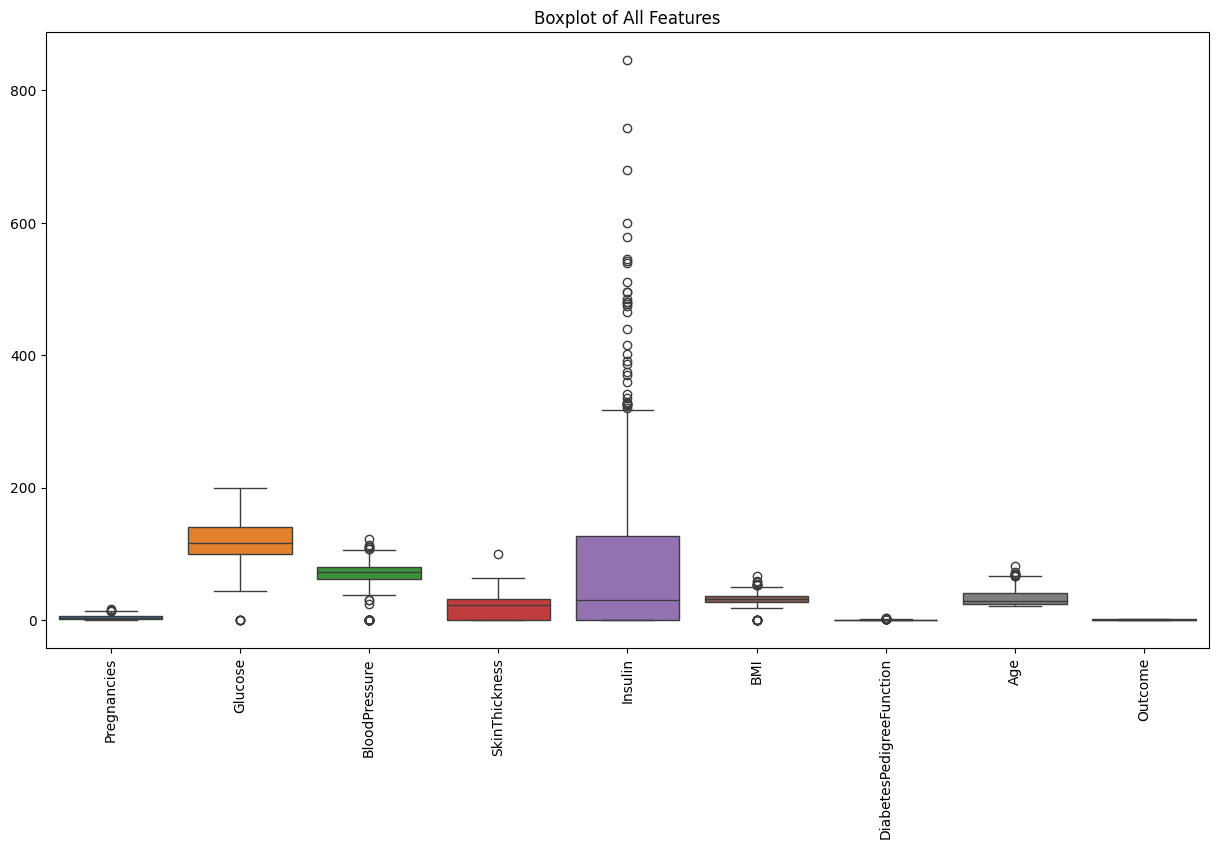

In [6]:
# Visualize using Boxplot
# Boxplot to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()

**Inference**


---


 Pregnancies: There are a few outliers
Glucose: There appear to be some outliers, but they are relatively few.
BloodPressure: The plot shows a few outliers.
SkinThickness: This feature has some outliers as well.
Insulin: This feature has a significant number of outliers, which are quite noticeable. The distribution is skewed, with several data points lying well above the upper whisker.
BMI: Some outliers are present, but they are fewer compared to Insulin.
DiabetesPedigreeFunction: There are a few outliers.
Age: This feature has a few outliers.
Outcome: There are no outliers in this feature as it's likely binary (0 or 1).

**Conclusion**

---



Insulin has the most pronounced outliers, which might require special attention during data preprocessing.
BloodPressure and SkinThickness also have noticeable outliers.

In [7]:
# Identifying features with outliers
outliers = df.columns[(df.apply(lambda x: ((x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                                           (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))))).any())]
print(f"Features with outliers: {', '.join(outliers)}")

Features with outliers: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age


In [8]:
# Correlation matrix
corr_matrix = df.corr()

In [9]:
# Find the two most correlated features
sorted_corr = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

In [10]:
# Exclude the correlation of the same feature (correlation of 1)
top_corr = sorted_corr[sorted_corr < 1].head(1)
print(f"\nMost correlated features:\n{top_corr}")


Most correlated features:
Pregnancies  Age    0.544341
dtype: float64


In [11]:
# Correlation coefficient of the two most related features
feature1, feature2 = top_corr.index[0]
corr_coefficient = df[feature1].corr(df[feature2])
print(f"Correlation coefficient between {feature1} and {feature2}: {corr_coefficient}")

Correlation coefficient between Pregnancies and Age: 0.5443412284023394


In [12]:
# Identify the symmetry (Skewness) of data for any two features
skewness_feature1 = df[feature1].skew()
skewness_feature2 = df[feature2].skew()
print(f"\nSkewness of {feature1}: {skewness_feature1}")
print(f"Skewness of {feature2}: {skewness_feature2}")


Skewness of Pregnancies: 0.9016739791518588
Skewness of Age: 1.1295967011444805


<Figure size 1400x600 with 0 Axes>

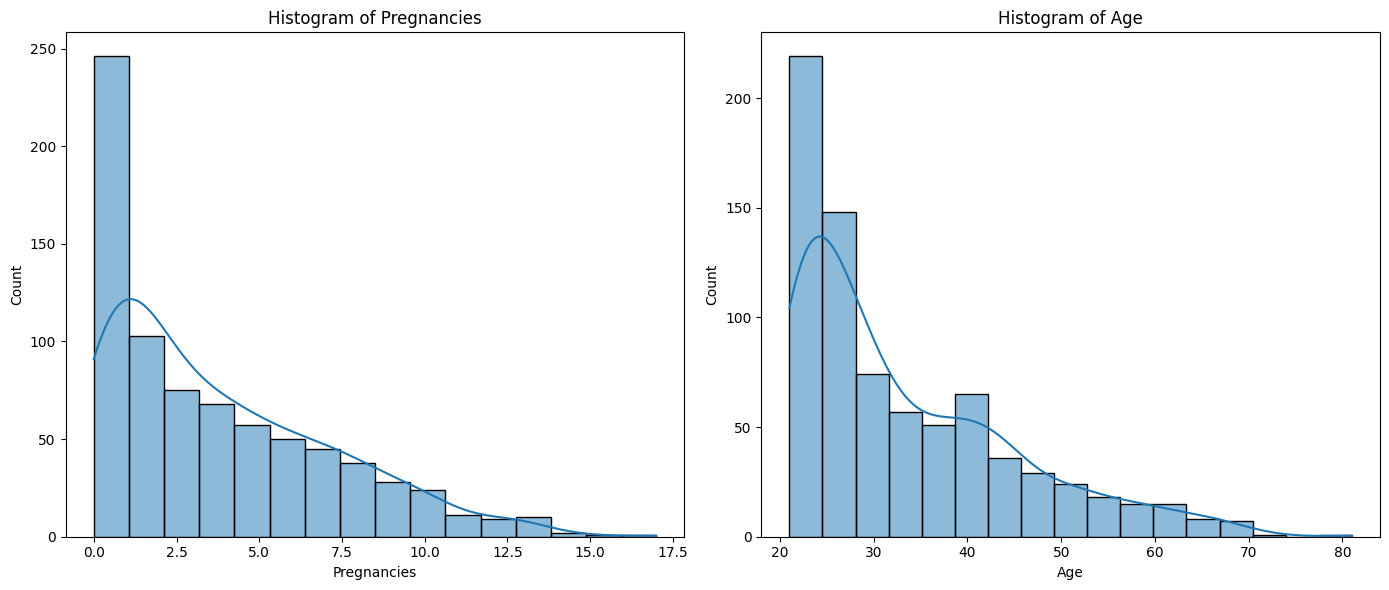

In [13]:
# Histogram to visualize symmetry of the two features
plt.figure(figsize=(14, 6))
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[feature1], kde=True)
plt.title(f'Histogram of {feature1}')
plt.subplot(1, 2, 2)
sns.histplot(df[feature2], kde=True)
plt.title(f'Histogram of {feature2}')
plt.tight_layout()
plt.show()

**Inference**

---

Both "Pregnancies" and "Age" exhibit right-skewed distributions. This means that the data is not symmetrically distributed and is biased towards lower values. In practical terms, this could indicate that in the dataset:
Most women have had a relatively low number of pregnancies.
The population is younger, with fewer older individuals.

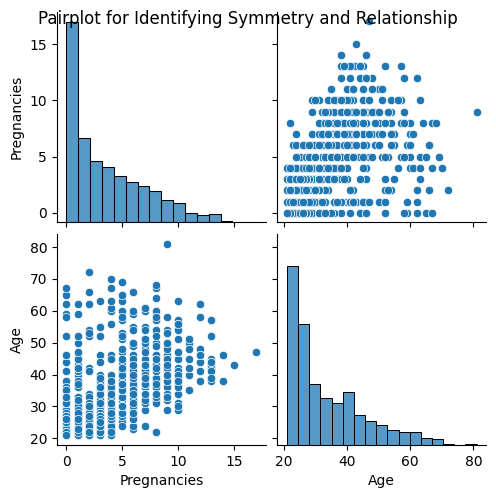

In [17]:
#. Identify the symmetry of data for any two features using pairplot
sns.pairplot(df[['Pregnancies', 'Age']])
plt.suptitle("Pairplot for Identifying Symmetry and Relationship")
plt.show()

**Symmetry** Both "Pregnancies" and "Age" show right-skewed distributions, meaning that most of the data points are concentrated on the lower end of the scale, with long tails extending towards higher values.
**Relationship ** There doesn't seem to be a strong correlation between "Pregnancies" and "Age," as evidenced by the scatter plot. The relationship is spread out, with no clear pattern indicating that one variable directly influences the other

Skewness of Glucose: 0.17375350179188992
Skewness of BMI: -0.42898158845356543


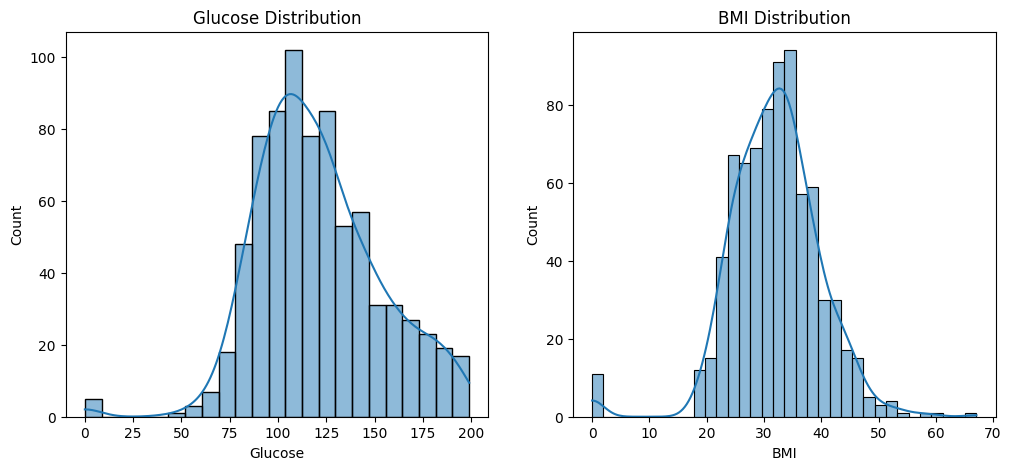

In [19]:
#just comparing other 2 feature other than pregnancies and age to anlayse the data
feature1 = 'Glucose'
feature2 = 'BMI'

# Check skewness using the pandas `skew` method
skewness_feature1 = df[feature1].skew()
skewness_feature2 = df[feature2].skew()

print(f"Skewness of {feature1}: {skewness_feature1}")
print(f"Skewness of {feature2}: {skewness_feature2}")

# Plot histograms for visual inspection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[feature1], kde=True)
plt.title(f'{feature1} Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df[feature2], kde=True)
plt.title(f'{feature2} Distribution')

plt.show()

** Glucose (Skewness = 0.1738)**

Positive Skewness: The skewness value of approximately 0.174 indicates a slight positive skew in the distribution of glucose levels.

---


**Inference**

The distribution of glucose levels is almost symmetric but slightly skewed to the right. This suggests that while most individuals in the dataset have average glucose levels, there are a few cases with higher glucose levels that slightly pull the distribution to the right. However, the skewness is very mild, so the distribution is close to normal.

---



 **BMI (Skewness = -0.4290)**

Negative Skewness: The skewness value of approximately -0.429 indicates a moderate negative skew in the distribution of BMI.

---


**Inference**
The distribution of BMI is slightly left-skewed, meaning that more individuals have BMI values above the mean compared to below it. This could indicate that a larger portion of the population has higher BMI, which might be indicative of overweight or obesity trends in the dataset. The negative skewness is moderate, suggesting the distribution is not perfectly symmetric, but the deviation is not extreme.

---



**Conclusion**
Both features are relatively close to symmetric but lean slightly towards their respective skew directions.
Glucose levels are mostly balanced, with a minor tendency towards higher values.
BMI has a more noticeable left skew, indicating that higher BMI values are more common in this dataset.